# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



### Respuesta

#### 1.1)

Una semilla es un número o vector que se utiliza para inicializar un generador de números pseudoaleatorios. Si se usa la misma semilla, siempre se generará la misma secuencia de números.

#### 1.2)

In [48]:
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.7403825290670738
b =  0.9303705530587089
c =  0.443010471292977


#### 1.3)

In [45]:
semilla = 150
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


#### 1.4)

In [50]:
semilla = 150
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


In [51]:
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


Se observa que al redefinir la semilla, se repite la secuencia de números generados. Esto se debe a que se reinicializa el generador, por lo que la secuencia de números se vuelve a generar desde el principio.

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

### Respuesta

In [23]:
a = 10
b = 15

In [26]:
random.randint(a,b)

15

La función random.randint(a,b) retorna un número entero aleatorio N en el rango (a,b), tal que a <= N <= b.

In [27]:
random.randrange(a,b)

12

La función random.randrange(a,b) retorna un número entero aleatorio N en el rango (a,b), pero a diferencia de randint(), no se incluye el límite superior b, es decir, a <= N < b.

In [28]:
random.uniform(a,b)

11.664892184781301

La función random.uniform(a,b) retorna un número de punto flotante aleatorio N en el rango (a,b). El valor b puede o no estar incluido en el rango dependiendo del redondeo de punto flotante de la expresión a + (b-a)*random().

### Clase NotSoRandom:

In [3]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

### Respuesta

#### 3.1)

Cálculo del período con semilla = 1234.

In [12]:
seed(1234)
periodo = 0
cicloCompleto = False
a = random()
j = 0
while(not cicloCompleto):
    b = random()
    j+=1
    if(a == b):
        cicloCompleto = True
print("Periodo: ",j)        

Periodo:  18


#### 3.2)

Cálculo del período con semilla = 150.

In [13]:
seed(150)
periodo = 0
cicloCompleto = False
a = random()
j = 0
while(not cicloCompleto):
    b = random()
    j+=1
    if(a == b):
        cicloCompleto = True
print("Periodo: ",j)   

Periodo:  18


Se observa en ambos casos el período es 18, esto tiene relación con el valor de M, que en el caso del generador NotSoRandom es 19, lo que significa que su período es M - 1 = 18 para cualquier semilla.

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


### Respuesta

#### 4.1)

Programación del generador congruencial lineal.

In [4]:
class GenCongruencialLineal():
    def __init__(self, semilla=10):
        self.u = semilla
    def random(self):
        A = 16807
        C = 0
        M = 2147483647
        self.u = (A*self.u + C)%M
        return self.u/M

#### 4.2)

In [23]:
gen = GenCongruencialLineal(15)
random.seed(15)
seq1 = []
seq2 = []
for i in range(1000000):
    seq1.append(gen.random())
    seq2.append(random.random())


Text(0.5, 1.0, 'Secuencia generador predefinido de Python')

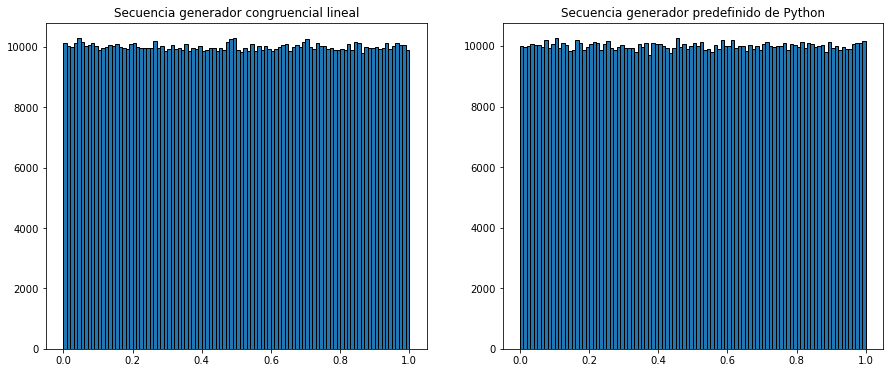

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].hist(seq1, edgecolor = 'black', bins = 100)
axs[0].set_title("Secuencia generador congruencial lineal")
axs[1].hist(seq2, edgecolor = 'black', bins = 100)
axs[1].set_title("Secuencia generador predefinido de Python")

In [162]:
gen.random()

0.46448019168548293

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

### Respuesta

In [168]:
seq = []
for i in range(1000):
    seq.append(random.normalvariate(10,12))

In [169]:
seq

[28.926772300386883,
 12.552821388376103,
 10.54154174795447,
 16.273981305401662,
 -3.471856072941913,
 7.873521545977737,
 -35.30595872734051,
 1.1017684031827226,
 0.7688430547672365,
 3.163164394476823,
 23.916451469088194,
 9.502221147914916,
 17.027555990615987,
 -5.768640488113967,
 -7.8402485772883175,
 8.418398433783235,
 2.8654055772469054,
 11.121733557345722,
 29.119567887781415,
 -7.006308007313908,
 21.818854152416996,
 -1.2619667779492652,
 21.327018143510585,
 33.475880941441964,
 7.949164667561009,
 43.48748854684818,
 24.653743376417133,
 14.932804593298174,
 12.596861112019564,
 10.26606663146603,
 -13.513776354763507,
 6.433288521377316,
 -5.933266697169383,
 31.03655006312784,
 -6.828138072624096,
 52.066255090074534,
 14.657353099586437,
 4.718506863690106,
 16.269696424440777,
 5.277281798117482,
 -22.01793225197052,
 21.6563314626119,
 2.882245203189399,
 -12.414797377255727,
 0.12525653375803714,
 -3.317526846185313,
 21.821262225228136,
 17.283607579140764,
 1

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

### Respuesta

In [ ]:
seq = []
for i in range(1000):
    seq.append(random.normalvariate(10,12))

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg